In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #data visualization library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix  # evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures  


# get data
df = pd.read_csv('weather_data.csv')
data_matrix = df.to_numpy()

df.head(10)
    


,Year,m,d,Time,Time zone,Precipitation amount (mm),Air temperature (degC),Maximum temperature (degC),Minimum temperature (degC)
0,2013,1,1,00:00,UTC,5.5,2.4,3,1.2
1,2013,1,2,00:00,UTC,2.5,1.6,2.7,1.2
2,2013,1,3,00:00,UTC,1.3,0.3,1.3,-0.4
3,2013,1,4,00:00,UTC,0.5,0.9,1.3,-0.3
4,2013,1,5,00:00,UTC,-1.0,-3.1,1.1,-4.4
5,2013,1,6,00:00,UTC,-1.0,-5.3,-4.1,-6.2
6,2013,1,7,00:00,UTC,1.2,-5.4,-2.2,-8.1
7,2013,1,8,00:00,UTC,2.4,-0.9,-0.3,-3.1
8,2013,1,9,00:00,UTC,0.7,-1.1,0.1,-2.5
9,2013,1,10,00:00,UTC,0.2,-4.1,-,-


In [2]:
print(data_matrix.shape[0])
count = 0
s = 0

    
print(count)
            
temp_v = df['Air temperature (degC)'].to_numpy()  
pre_v = df['Precipitation amount (mm)'].to_numpy()
for k in range(len(pre_v)):
    if pre_v[k] == -1:
        pre_v[k] = 0.
        
# create columns of shifted data
T_1 = (np.concatenate((temp_v[::-1],["-"]),axis = 0)[::-1])[0:3652]
T_2 = (np.concatenate((temp_v[::-1],["-","-"]),axis = 0)[::-1])[0:3652]
T_3 = (np.concatenate((temp_v[::-1],["-","-","-"]),axis = 0)[::-1])[0:3652]
T_4 = (np.concatenate((temp_v[::-1],["-","-","-","-"]),axis = 0)[::-1])[0:3652]


P_1 = (np.concatenate((pre_v[::-1],["-"]),axis = 0)[::-1])[0:3652]
P_2 = (np.concatenate((pre_v[::-1],["-","-"]),axis = 0)[::-1])[0:3652]
P_3 = (np.concatenate((pre_v[::-1],["-","-","-"]),axis = 0)[::-1])[0:3652]
P_4 = (np.concatenate((pre_v[::-1],["-","-","-","-"]),axis = 0)[::-1])[0:3652]
    

# feature matrix
features = df
features = features.drop(['Year','d','Time','Time zone','Air temperature (degC)','Maximum temperature (degC)','Minimum temperature (degC)'],axis=1)

print(features.shape)
print(T_1.shape)

features = features.assign(T1 = T_1)
features = features.assign(T2 = T_2)
features = features.assign(T3 = T_3)
features = features.assign(T4 = T_4)


features = features.assign(P1 = P_1)
features = features.assign(P2 = P_2)
features = features.assign(P3 = P_3)
features = features.assign(P4 = P_4)

3652
0
(3652, 2)
(3652,)


s 1
[66.06 60.6  35.92 36.64 40.57 63.01 49.74 83.61 56.24 68.46 71.2  71.74]


Text(0.5, 0, 'Month')

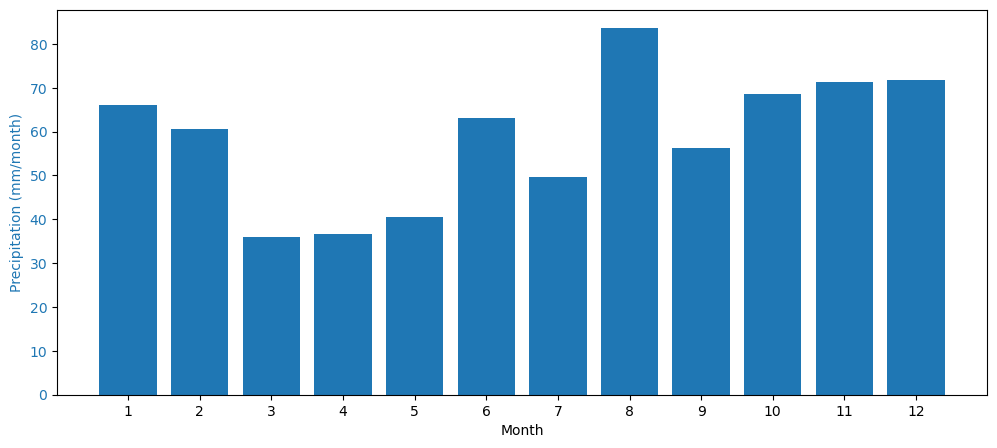

In [3]:
# create precipitation histogramm

month_pre = [0,0,0,0,0,0,0,0,0,0,0,0]
print("s",features.to_numpy()[1,0])

for v in range(len(features)):
    month_pre[int(features.to_numpy()[v,0])-1] += features.to_numpy()[v,1]
    
        
month_pre = month_pre * np.linspace(0.1,0.1,12)
print(month_pre)
features.head(10)

fig, ax1 = plt.subplots(figsize=(12, 5))
color = 'tab:blue'
ax1.bar(1+np.arange(12), month_pre, color=color)
ax1.set_xticks(1+np.arange(12, step=1))
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel("Precipitation (mm/month)", color=color)
ax1.set_xlabel("Month")

In [4]:
#find indecies of missing data
missing_list =[]
for i in range(features.shape[0]):
    s = 0
    
    for j in range(10):
        if features.to_numpy()[i,j] == "-":
            s += 1
            break
    if s > 0:
        missing_list.append(i)
        count += 1


In [5]:
# drop rows with missing data
new_features = features.drop(missing_list,axis = 0)
new_features.index = range(new_features.shape[0])
print(new_features.shape)

new_features.drop(['Precipitation amount (mm)'],axis = 1).head()

(3427, 10)


,m,T1,T2,T3,T4,P1,P2,P3,P4
0,1,0.9,0.3,1.6,2.4,0.5,1.3,2.5,5.5
1,1,-3.1,0.9,0.3,1.6,0.0,0.5,1.3,2.5
2,1,-5.3,-3.1,0.9,0.3,0.0,0.0,0.5,1.3
3,1,-5.4,-5.3,-3.1,0.9,1.2,0.0,0.0,0.5
4,1,-0.9,-5.4,-5.3,-3.1,2.4,1.2,0.0,0.0


In [6]:
minval = new_features['Precipitation amount (mm)'].min()
maxval = new_features['Precipitation amount (mm)'].max()

# multi_labels = [0,1,2,3]
# multi_cut_bins = [minval,0.3,1,5,maxval]
multi_labels = [0,1]
multi_cut_bins = [minval,1,maxval]

# create labels
y = pd.cut(new_features['Precipitation amount (mm)'],\
                            bins = multi_cut_bins, labels = multi_labels,include_lowest = True)
X = new_features.drop(['Precipitation amount (mm)'],axis = 1)
y = y.to_numpy()
X = X.to_numpy()
print(y.shape)
print(X.shape)

(3427,)
(3427, 9)


In [7]:
# split into training and validation sets
X_train, X_val,  y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=22)
print("training set length:",len(y_train) ,"validation set length:",len(y_val))

training set length: 2398 validation set length: 1029


In [9]:
clf = LogisticRegression(random_state = 22,solver = 'newton-cg')
poly = PolynomialFeatures(degree = 4)    # generate polynomial features
X_train_poly = poly.fit_transform(X_train[400:1500]) 
clf = clf.fit(X_train_poly,y_train[400:1500])



X_val_poly = poly.transform(X_val)
y_pred = clf.predict(X_val_poly)
acc = accuracy_score(y_val,y_pred)

c_mat = confusion_matrix(y_val,y_pred)
print(c_mat,acc)


[[518 187]
 [207 117]] 0.6171039844509232


/opt/software/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
